# Load Data

In [1]:
# Setup the dependencies
using Pkg; Pkg.add("Suppressor"); using Suppressor: @suppress;
@suppress Pkg.add(url="https://github.com/JuDO-dev/AirBorne.jl#dev");
@suppress Pkg.add(["Dates","Plots","DataFrames", "DirectSearch","DotMaps","LinearAlgebra","Polynomials","SparseArrays","MathOptInterface","HiddenMarkovModels","Distributions"]);
fig_dir = joinpath(@__DIR__, "figures")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Suppressor ‚îÄ v0.2.5
    Updating `~/.julia/environments/v1.8/Project.toml`
  [fd094767] + Suppressor v0.2.5
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [fd094767] + Suppressor v0.2.5
Precompiling project...
  ‚úì Suppressor
  1 dependency successfully precompiled in 7 seconds. 216 already precompiled.


"/root/project/dissertationFigures/figures"

In [10]:
using DataFrames: groupby, combine

bundle_id="Mark2"
cache_dir = joinpath(@__DIR__, "data", "cache")

########################################################
###    Pick the 5 most traded companies per sector   ###
########################################################
using AirBorne.ETL.NASDAQ: screener
tickers_df = screener()
store_bundle(tickers_df; bundle_id="NASDAQscreener_"*bundle_id, archive=true, cache_dir=cache_dir)


[ Info: Storing /root/project/dissertationFigures/data/cache/Mark1/2023_08_19_16_9_49_915.parq.snappy
[ Info: Done!


4√ó12 DataFrame
 Row ‚îÇ close    high     low      open     volume  date                 unix   ‚ãØ
     ‚îÇ Float64  Float64  Float64  Float64  Int64   DateTime             Int64  ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ   11.25    11.25    10.5     10.95   64140  2017-01-03T10:30:00  148345 ‚ãØ
   2 ‚îÇ   11.7     11.7     10.95    11.4    88980  2017-01-04T10:30:00  148354
   3 ‚îÇ   11.85    12.0     11.25    11.55  137260  2017-01-05T10:30:00  148362
   4 ‚îÇ   12.15    12.15    11.7     11.85  304647  2017-01-06T10:30:00  148371
                                                               6 columns omitted

In [121]:
using DataFrames: groupby, combine
using AirBorne.Utils: get_latest_N
topPerformers=2
bundle_id="Mark2"
filtered_df =tickers_df[[   x!="" ? parse(Int64, x)<2016 : false for x in tickers_df.ipoyear],["symbol","marketCap","sector","volume"]]
filtered_df[!,"volume"]=parse.(Int64,filtered_df[!,"volume"])
filtered_df[!,"marketCap"]=parse.(Float64,filtered_df[!,"marketCap"])
grouped_df = groupby(filtered_df,"sector")
f(sdf)= get_latest_N(sdf,:volume,topPerformers;rev=true)
result = combine(grouped_df,f)
#####################################################
###    Extract interday date from Yahoo Finance   ###
#####################################################
using AirBorne.ETL.Cache: store_bundle
# To generate the "demo" data use:
using AirBorne.ETL.YFinance: get_interday_data
using AirBorne.ETL.Cache: store_bundle
using Dates: DateTime, datetime2unix
from = DateTime("2017-01-01"); to = DateTime("2022-01-01")
u_from = string(round(Int, datetime2unix(from)));
u_to = string(round(Int, datetime2unix(to)))
data = get_interday_data(result.symbol, u_from, u_to)
store_bundle(data; bundle_id=bundle_id, archive=true, cache_dir=cache_dir)
@info "Done!"
first(data,4)

[ Info: Storing /root/project/dissertationFigures/data/cache/Mark2/2023_08_29_1_27_22_549.parq.snappy
[ Info: Done!


4√ó12 DataFrame
 Row ‚îÇ close    high     low      open     volume  date                 unix   ‚ãØ
     ‚îÇ Float64  Float64  Float64  Float64  Int64   DateTime             Int64  ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ 11.1899  11.2499  10.5029  10.9499   64141  2017-01-03T10:30:00  148345 ‚ãØ
   2 ‚îÇ 11.6999  11.6999  10.9499  11.3549   88980  2017-01-04T10:30:00  148354
   3 ‚îÇ 11.8769  11.9249  11.2499  11.5499  137302  2017-01-05T10:30:00  148362
   4 ‚îÇ 12.1124  12.1874  11.6999  11.8499  304646  2017-01-06T10:30:00  148371
                                                               6 columns omitted

In [ ]:
# If you already have the data somewhere accessible by the cache loading the data directly is faster
using AirBorne.ETL.Cache: load_bundle
using DataFrames: DataFrame
bundle_id="Mark1"
bundle_id="Mark2"
cache_dir = joinpath(@__DIR__, "data", "cache")
data=deepcopy(DataFrame(load_bundle(bundle_id;cache_dir=cache_dir)))

data[data.assetID.=="NYQ/KEYS",:symbol] .= "OKEYS" # "NYQ/KEYS" has problems on the stockValuation function. probably due to "keys"
data[data.assetID.=="NYQ/KEYS",:assetID] .= "NYQ/OKEYS"

using AirBorne.ETL.AssetValuation: stockValuation, returns
dollar_symbol = "FEX/USD"
account_currency = dollar_symbol
sv=stockValuation(data) # Stock Value dataframe
sv[!,dollar_symbol].=1.0 
sr=returns(sv) # Stock return dataframe
@info "DataGenerated"

In [118]:
using AirBorne.ETL.Cache: store_bundle
# tickers_df=deepcopy(DataFrame(load_bundle("NASDAQscreener_Mark1";cache_dir=cache_dir)))
store_bundle(tickers_df; bundle_id="NASDAQscreener"*bundle_id, archive=true, cache_dir=cache_dir)


[ Info: Storing /root/project/dissertationFigures/data/cache/NASDAQscreenerMark1/2023_08_29_1_25_10_247.parq.snappy


‚úè Parquet2.FileWriter{IOStream}(/root/project/dissertationFigures/data/cache/NASDAQscreenerMark1/2023_08_29_1_25_10_247.parq.snappy)

# Forecast methods

In [164]:
@info size(sr) size(returnHistoryWarmUp)
# nHiddenStates=2

# obs_seq = matrix2seq(float.(Matrix(returnHistoryStartData_Validation[:,traded_assets])))
# hmm_init=random_gaussian_hmm(nHiddenStates,length(obs_seq[1]))
# hmm_est, logL_evolution = baum_welch(hmm_init, obs_seq; rtol=-Inf, check_loglikelihood_increasing=false)


‚îå Info: (1259, 29)
‚îî   size(returnHistoryWarmUp) = (502, 29)


In [143]:
using AirBorne.Structures: ContextTypeA,c_get
using AirBorne.ETL.AssetValuation: covariance
using Statistics: cov,mean
using JuMP: @variable, @expression, Model, @objective, @constraint, optimize!, @NLobjective, value, set_silent
using Ipopt: Ipopt
using HiddenMarkovModels: HMM, transition_matrix, baum_welch, viterbi, obs_distribution, rand_trans_mat #, em
using Distributions: MvNormal
using LinearAlgebra: I


########################
### Perfect Forecast ###
########################
# Used for accuracy measurement
function perfectForecastReturns(context::ContextTypeA,returnData::DataFrame)
    n_assets = length(context.extra.symbolOrder)
    horizon = c_get(context,"futureHorizon",7) 
    r_mat=float.(Matrix(first(sr[sr.date.>context.current_event.date,context.extra.symbolOrder],horizon)))
    Œ£ = zeros(n_assets,n_assets)
    return [ (r_mat[i,:],Œ£) for i=1:horizon] # Mean-Variance Forecast 
end


##################
### Last Value ###
##################
function LV_Forecast(context::ContextTypeA)
    # Hyper-Parameters
    varianceWindowSize  = c_get(context, "varianceWindowSize", 7)
    expectedReturnWindowSize  = c_get(context, "expectedReturnWindowSize", 7)
    futureHorizon = c_get(context,"futureHorizon", 5)
    
    minDataPoints =  max(expectedReturnWindowSize,varianceWindowSize)+1
    if size(context.extra.returnHistory,1) < minDataPoints
        error("Not enough data, please allow $(minDataPoints) data events before forecasting. Current datapoints: $(size(context.extra.returnHistory,1))")
    end
    
    # On an update this can be made more efficient by only calculating the latest value
    rMat = float.(Matrix(context.extra.returnHistory[end-minDataPoints+1:end,context.extra.symbolOrder])) # Initial Returns Matrix    
    # Memory Pre-allocation
    Œº = mean(rMat[end-expectedReturnWindowSize+1:end,:];dims=1)
    if varianceWindowSize>1
        Œ£ = cov(rMat[end-varianceWindowSize+1:end,:])
    else
        Œ£ = zeros(size(rMat,2),size(rMat,2))
    end
    return [(Œº,Œ£) for i=1:futureHorizon] 
end

#########################
### Linear Regression ###
#########################
function LR_Forecast(context::ContextTypeA)
    # Hyper-Parameters
    elementWise = c_get(context,"elementWise",true)
    varianceWindowSize  = c_get(context, "varianceWindowSize", 7)
    expectedReturnWindowSize  = c_get(context, "expectedReturnWindowSize", 7)
    pastHorizon = c_get(context,"pastHorizon", 7)
    futureHorizon = c_get(context,"futureHorizon", 5)
    
    minDataPoints =  pastHorizon+max(expectedReturnWindowSize,varianceWindowSize)
    if size(context.extra.returnHistory,1) < minDataPoints
        error("Not enough data, please allow $(minDataPoints) data events before forecasting. Current datapoints: $(size(context.extra.returnHistory,1))")
    end
    
    rMat = float.(Matrix(context.extra.returnHistory[end-minDataPoints+1:end,context.extra.symbolOrder])) # Initial Returns Matrix    
    # Memory Pre-allocation (Calibration matrices)
    ŒºMat = zeros(pastHorizon,size(rMat,2))
    Œ£Mat = zeros(size(rMat,2),size(rMat,2),pastHorizon)
    for i= size(rMat,1)-pastHorizon+1:size(rMat,1) 
        ix= i-(size(rMat,1)-pastHorizon) 
        ŒºMat[ix,:] = mean(rMat[i-expectedReturnWindowSize+1:i,:];dims=1)
        Œ£Mat[:,:,ix] = cov(rMat[i-varianceWindowSize+1:i,:])
    end
    
    # Pre-allocate Forecast Matrices
    ŒºFMat = zeros(futureHorizon,size(rMat,2))
    Œ£FMat = zeros(size(rMat,2),size(rMat,2),futureHorizon)

    if elementWise # Forecast each entry of Œº & Œ£ using normal linear regression
        aŒº= zeros(size(ŒºMat[1,:]))
        bŒº= zeros(size(ŒºMat[1,:]))
        aŒ£= zeros(size(Œ£Mat[:,:,1]))
        bŒ£= zeros(size(Œ£Mat[:,:,1]))
        X = hcat(ones(pastHorizon,1), 1:pastHorizon)
        XX=((X'*X)^-1)
        for i=1:length(aŒº)
            bŒº[i],aŒº[i] = XX * (X' * ŒºMat[:,i])
            for j=1:i # Leverage Symmetry
               bŒ£[j,i],aŒ£[j,i] = bŒ£[i,j],aŒ£[i,j] =  XX * (X' * Œ£Mat[i,j,:])
            end
        end
    else # Forecast Œº & Œ£ as points of a high dimensional space
        Œºmodel = Model(Ipopt.Optimizer)
        ŒºShape=size(ŒºMat[1,:])[1]
        @variable(Œºmodel, a[1:ŒºShape[1]])
        @variable(Œºmodel, b[1:ŒºShape[1]])
        @objective(Œºmodel,Min,sum([sum(x.^2) for x in [a*i+b-ŒºMat[i,:] for i=1:pastHorizon]]))
        optimize!(Œºmodel)
        aŒº = deepcopy(value.(a)) 
        bŒº = deepcopy(value.(b)) 
        Œ£model = Model(Ipopt.Optimizer)
        Œ£Shape=size(Œ£Mat[:,:,1])
        @variable(Œ£model, a[1:Œ£Shape[1],1:Œ£Shape[2]]) 
        @variable(Œ£model, b[1:Œ£Shape[1],1:Œ£Shape[2]])# I could add constraint of symmetry & diagonal being strictly positive
        @objective(Œ£model,Min,sum([sum(x.^2) for x in [a*i+b-Œ£Mat[:,:,i] for i=1:pastHorizon]]))
        optimize!(Œ£model)
        aŒ£ = deepcopy(value.(a)) 
        bŒ£ = deepcopy(value.(b)) 
    end
    Œºf(i) = aŒº.*i + bŒº
    Œ£f(i) = aŒ£.*i + bŒ£
    out=[]
    for i = 1:futureHorizon
        ŒºFMat[i,:] = Œºf(i+pastHorizon)'
        Œ£FMat[:,:,i] = Œ£f(i+pastHorizon)
        push!(out,(ŒºFMat[i,:],Œ£FMat[:,:,i]))
    end
   return out 
end



###################
### Behavioural ###
###################
using LinearAlgebra: qr
function quickBehaviouralForecast(Y,y_ini)
    return  Y[length(y_ini)+1:end,:] * (qr(Y[1:length(y_ini),:]) \ y_ini)
end

function behaviouralForecast(context::ContextTypeA)
    
    ########################
    ### Hyper-Parameters ###
    ########################
    elementWise = c_get(context,"elementWise",true)
    pastHorizon = c_get(context,"pastHorizon", 7)
    futureHorizon = c_get(context,"futureHorizon", 5)
    varianceWindowSize  = get(context.parameters, "varianceWindowSize", 0)
    expectedReturnWindowSize  = get(context.parameters, "expectedReturnWindowSize", 1)
    
    # The minimum data points in case of elementwise forecast is equal to the past horizon (I may exclude the currency as its value is always 1, thus its returns and variance always 0)
    trajetory_length = (pastHorizon + futureHorizon) * (elementWise ? 1 : length(context.extra.symbolOrder)-1)
    n_columns_for_reversibility = (pastHorizon) * (elementWise ? 1 : length(context.extra.symbolOrder)-1)
    N = trajetory_length + n_columns_for_reversibility # Number of datapoints in Hankel Matrix
    
    minDataPoints =  trajetory_length + n_columns_for_reversibility +  max(expectedReturnWindowSize,varianceWindowSize) # @info "minDataPoints" minDataPoints
    if size(context.extra.returnHistory,1) < minDataPoints
        error("Not enough data, please allow $(minDataPoints) data events before forecasting. Current datapoints: $(size(context.extra.returnHistory,1))")
    end

    ###############################
    ### Statistics Calculations ###
    ###############################
    
    # TODO: Implement incremental updates to Hankel Matrix to improve efficiency
    rMat = float.(Matrix(context.extra.returnHistory[end-minDataPoints+1:end,context.extra.symbolOrder])) # Initial Returns Matrix
    if c_get(context,"excludeCurrencyFromCalculation", true)
        rMat = rMat[:,1:end-1] # Remove last column
    end
    
    ŒºMat = zeros(N,size(rMat,2))
    Œ£Mat = zeros(size(rMat,2),size(rMat,2),N)
    for i= size(rMat,1)-N+1:size(rMat,1) 
        # @info i
        ix= i-(size(rMat,1)-N) 
        # @info ix
      ŒºMat[ix,:] = expectedReturnWindowSize > 1 ? mean(rMat[i-expectedReturnWindowSize+1:i,:];dims=1) : rMat[i,:]
      if  varianceWindowSize > 1; Œ£Mat[:,:,ix] = cov(rMat[i-varianceWindowSize+1:i,:]); end
    end
    
    ###############################
    ### Behavioural Forecasting ###
    ###############################
    
    # Memory pre-allocation
    ŒºFMat = zeros(futureHorizon,size(rMat,2)+1) # Forecast of expected return
    Œ£FMat = zeros(size(rMat,2)+1,size(rMat,2)+1,futureHorizon) # Forecast of variance
    if elementWise
        
        # Memory pre-allocation
        HŒ£i = zeros(trajetory_length,n_columns_for_reversibility) # Individual Covariance Hankel Matrix for asset pair
        HŒº = zeros(trajetory_length,n_columns_for_reversibility, size(rMat,2)) # Hankel Matrices for expected returns
        HŒ£ = Dict() # Hankel Matrices for covariance (since there is a lot of symmetry in this matrix, a hashmap is chosen as storage structure)
        
        Œº_ini = ŒºMat[end-pastHorizon+1:end,:] # Initial condition for expected returns
        Œ£_ini = zeros(size(rMat,2),size(rMat,2),pastHorizon)
        
        for assetIx=1:size(rMat,2) # Iterate over each column (each asset)
            HŒº[:,:,assetIx]= cat([ ŒºMat[end-i-trajetory_length+1:end-i] for i=1:n_columns_for_reversibility]...;dims=2)
            ŒºFMat[:,assetIx]= quickBehaviouralForecast(HŒº[:,:,assetIx],Œº_ini[:,assetIx])
            if varianceWindowSize>1 # Only go here if necessary
                for coAssetIx=1:assetIx # Build Hankel Matrix for Covariance
                    Œ£_ini[assetIx,coAssetIx,:] = Œ£_ini[coAssetIx,assetIx,:] = Œ£Mat[assetIx, coAssetIx, end-pastHorizon+1:end] 
                    HŒ£i[:,:] = cat([ Œ£Mat[assetIx, coAssetIx, end-i-trajetory_length+1:end-i]  for i=1:n_columns_for_reversibility]...;dims=2)
                    HŒ£[(coAssetIx,assetIx)] = HŒ£[(assetIx,coAssetIx)] = HŒ£i
                    Œ£FMat[coAssetIx,assetIx,:] = Œ£FMat[assetIx,coAssetIx,:] = quickBehaviouralForecast(HŒ£i,Œ£Mat[assetIx, coAssetIx, end-pastHorizon+1:end] )
                end
            end
         end
    else # Apply Behavioural forecast to all asset together, we need chunks 
        nAssets=size(rMat,2)
        ŒºVec = reshape(ŒºMat',1,:) # Restructured into: [a1,b1,c1,a2,b2,c2,...,aN,bN,cN] # Reshape ŒºMat into 1D vector, easier to manipulate # @info "ŒºMat" ŒºMat ŒºVec
        Œº_ini = ŒºVec[end-pastHorizon*nAssets+1:end]
        HŒº= cat(reverse([ŒºVec[end-trajetory_length-nAssets*(i-1)+1:end-nAssets*(i-1)] for i=1:n_columns_for_reversibility])...;dims=2) # @info "HŒº" Œº_ini HŒº 
        ŒºF =  quickBehaviouralForecast(HŒº,Œº_ini )
        ŒºFMat[:,1:end-1] = vcat([ŒºF[1+nAssets*(i-1):nAssets*i]' for i=1:futureHorizon]...)# @info "ŒºF" ŒºF ŒºFMat
        
        
    end
    return [(ŒºFMat[i,:],Œ£FMat[:,:,i]) for i=1:futureHorizon]
end


###########################
### Hidden Markov Model ###
###########################

function random_gaussian_hmm(N,dims)
       state_probability = ones(N) / N  # initial distribution (of the states)
       state_transition_matrix = rand_trans_mat(N)  # transition matrix (of the states)
       state_Covariance = Matrix(I, dims, dims).*1.0
       dists = [MvNormal(rand(dims),  state_Covariance) for n in 1:N]  # observation distributions (of the states)
       return HMM(state_probability, state_transition_matrix, dists)
end

function fitHMM(hmm_init,obs_seq)
    # @info size(obs_seq) obs_seq[end]   hmm_init
    hmm_est, logL_evolution = baum_welch(hmm_init, obs_seq[end-200:end]; rtol=-Inf, check_loglikelihood_increasing=false)
   return hmm_est
end

function gen_hmm(obs_seq::Vector{Vector{Float64}}; nHiddenStates::Int64=2, hmm_init::Union{Nothing,HMM}=nothing)
       if isnothing(hmm_init)
           hmm_init=random_gaussian_hmm(nHiddenStates,length(obs_seq[1]))
       end
         # @info "fitHMM"
       return fitHMM(hmm_init,obs_seq)
end

matrix2seq(obs_seq) = [obs_seq[i,:] for i=1:size(obs_seq,1)]
get_current_state(hmm,obs_seq) = viterbi(hmm, obs_seq)[end]


function hmmForecast(context::ContextTypeA)
    excludeCurrencyFromCalculation = c_get(context, "excludeCurrencyFromCalculation", true)
    futureHorizon = c_get(context,"futureHorizon",7)
    # If new data has come update observation sequence
    
        # @info size(context.extra.obs_seq) size(context.extra.returnHistory)
    if  size(context.extra.returnHistory,1)>context.extra.lastScanIx
        # Remove Currency Symbol (as they are all 0)
        symbols =  excludeCurrencyFromCalculation ? context.extra.symbolOrder[1:end-1] : context.extra.symbolOrder
        new_obs_seq = matrix2seq(float.(Matrix(
                    context.extra.returnHistory[context.extra.lastScanIx:end,symbols]
        )))
        if length(context.extra.obs_seq)==0
            context.extra.obs_seq=Vector{Vector{Float64}}(new_obs_seq)
        else
            append!(context.extra.obs_seq,new_obs_seq)
        end
        context.extra.lastScanIx = size(context.extra.returnHistory,1)
    end  
        # @info size(context.extra.obs_seq)
    if  (mod(context.extra.lastScanIx, context.parameters.recalibrationPeriod)==0) || isnothing(context.extra.hmm)
        context.extra.hmm = gen_hmm(context.extra.obs_seq; hmm_init=context.extra.hmm)
    end
    hmm = context.extra.hmm; N=length(hmm);
    fitDists=[obs_distribution(hmm,i) for i=1:length(hmm)]
    Œºs= [f.Œº for f=fitDists];    Œ£s=[f.Œ£ for f=fitDists]
    q0 = zeros(N);
    q0[get_current_state(hmm,context.extra.obs_seq)] = 1 # Probability of each state at t=0
    Œº0 = sum(q0.*Œºs); Œ£0 = sum([ q0[i].*Œ£s[i] for i=1:N])
    M=length(Œº0)
    oM= length(context.extra.symbolOrder)
    
    # Pre-allocation of output
    forecast = [(zeros(oM),zeros(oM,oM)) for i=1:futureHorizon] 
    for i=1:futureHorizon
        q1 = transition_matrix(hmm)*q0
        Œº1 = sum(q1.*Œºs)
        Œ£1 = sum([ q1[i].*(Œ£s[i] + ((Œºs[i]-Œº1)*(Œºs[i]-Œº1)'))  for i=1:N]) 
        q0,Œº0,Œ£0=q1,Œº1,Œ£1
        forecast[i][1][1:M]=Œº1
        forecast[i][2][1:M,1:M]=Œ£1
    end
    return forecast
end


### Handy functions for post-processing
function produce_ŒºFcastMat(context)
    ŒºFcastMat = zeros(length(context.extra.symbolOrder),context.extra.futureHorizon, length(context.audit.extraHistory)-2)
    for simEvent=3:length(context.audit.extraHistory)
        ŒºFcastMat[:,:,simEvent-2] = vcat([x[1] for x=context.audit.extraHistory[simEvent].forecastResult]...)'
    end
    return ŒºFcastMat
end

produce_ŒºFcastMat (generic function with 1 method)

## Parameter optimization

- 2017/18 provide a initial set of data for the methods to be able to predict
- 2019 is used as training data
- 2020 is used as testing data
- 2021 is used for results

In [180]:
# Define training/testing sets
using AirBorne.Structures: TimeEvent
using Dates: year

# General problem setting
futureHorizon=7
maxSimIter=20 # Truncation to speed up results
traded_assets= unique(data.assetID)
account_currency = "FEX/USD"

# Define time-partitions of data
training_years=[2019]
validation_years=[2020]
backtest_years=[2021]

# Define starting datasets per partition
returnHistoryWarmUp = sr[year.(sr.date).<minimum(training_years),:]
returnHistoryStartData_Validation = sr[year.(sr.date).<minimum(validation_years),:]
returnHistoryStartData_Backtest = sr[year.(sr.date).<minimum(backtest_years),:]

# Define simulation events per partition
allEvents =  [TimeEvent(t, "data_transfer") for t in sort(unique(data.date); rev=false)]
trainingEvents = [ e for e in allEvents if year(e.date) in training_years]
validationEvents = [ e for e in allEvents if year(e.date) in validation_years]
backtestingEvents = [ e for e in allEvents if year(e.date) in backtest_years]
backtestingEvents = backtestingEvents[1:end-futureHorizon]
@info "Event sets generated"


# Order execution procedure
using AirBorne.Markets.StaticMarket: execute_orders!, expose_data
my_expose_data(context, data) = expose_data(context, data; historical=false)
my_execute_orders!(context, data) = return execute_orders!(context, data; propagateBalanceToPortfolio=true)


[ Info: Event sets generated


my_execute_orders! (generic function with 1 method)

In [7]:
import AirBorne.Strategies.MeanVarianceMPC as MPC

function general_initialize!(context,extras,params; returnHistoryStartData=returnHistoryWarmUp) 
    MPC.initialize!(
            context;
            currency_symbol=account_currency,
            min_data_samples=0,
            otherExtras=extras,
            parameters=params,
        )
    # Minor correction to multiple insertions of account_currency
    context.extra.symbolOrder = [x for x=context.extra.symbolOrder if x!=account_currency]
    push!(context.extra.symbolOrder,account_currency)
    
    # @info context.extra.symbolOrder
    context.extra.returnHistory = returnHistoryStartData # Data to be fed at first (for warm-start purposes)
end

function forcastTradingLogic!(context, data)
    if size(data, 1) == 0;return nothing;end # No New data, nothing to do
    context.extra.pastValue = context.extra.currentValue
    context.extra.currentValue = stockValuation(data)
    context.extra.currentValue[!, context.extra.currency_symbol] .= 1.0 # Add currency to values
    [push!(context.extra.valueHistory, r) for r in eachrow(context.extra.currentValue)]
    if size(context.extra.pastValue, 1) > 0 # Add new data to history record
        r1 = returns(vcat(context.extra.pastValue, context.extra.currentValue))
        push!(context.extra.returnHistory, r1[end, :])
    end
    context.extra.forecastResult=context.extra.forcastFunction(context)
end


forcastTradingLogic! (generic function with 1 method)

### Reference forecasts

The value of the variance is estimated as the variance of the sample.

In [127]:

import AirBorne.Engines.DEDS as DEDS

traded_assets= unique(data.assetID)
account_currency = "FEX/USD"
refForecast(context) = perfectForecastReturns(context,sr)

ref_params=Dict()
ref_extras = Dict(     
    "futureHorizon"=>7, 
    "symbolOrder"=>traded_assets, 
    "forcastFunction"=>refForecast,
    "forecastResult"=>[], 
)

Ref_initialize!(context) =  general_initialize!(context,ref_extras,ref_params; returnHistoryStartData=returnHistoryWarmUp)

training_ref_context = DEDS.run(
        data,
        Ref_initialize!,
        forcastTradingLogic!,
        my_execute_orders!,
        my_expose_data;
        verbose=true,
        audit=true,
        initialEvents=deepcopy(trainingEvents),
    )

validation_ref_context = DEDS.run(
        data,
        Ref_initialize!,
        forcastTradingLogic!,
        my_execute_orders!,
        my_expose_data;
        verbose=true,
        audit=true,
        initialEvents=deepcopy(validationEvents),
    )

train_ŒºFcastMat=produce_ŒºFcastMat(training_ref_context)
val_ŒºFcastMat=produce_ŒºFcastMat(validation_ref_context)
@info "Generated reference data"

[ Info: Generated reference data


### Tuning functions

In [128]:
using DirectSearch: 
    DSProblem, Optimize!, SetInitialPoint, SetObjective, SetIterationLimit, SetGranularity, AddExtremeConstraint, AddProgressiveConstraint

function generic_Œº_MAE_obj(vec_params,param_keys_order; 
        extra=Dict(), relative_scope=nothing, maxSimIter=20, warmUpData=returnHistoryWarmUp,
        simEvents=trainingEvents, data=data,target_data=target_data) 
    # Produce forecast
    iteration_params = Dict([param_keys_order[i] => Int(vec_params[i]) for i=1:length(vec_params)])
    init!(context) =  general_initialize!(context,extra,iteration_params; returnHistoryStartData=returnHistoryWarmUp)
    context = DEDS.run(data, init!, forcastTradingLogic!,my_execute_orders!,my_expose_data;
            verbose=false, audit=true, max_iter=maxSimIter, initialEvents=deepcopy(simEvents))
    
    # Structure result and fetch target values
    ŒºFcastMat=produce_ŒºFcastMat(context)
    N = size(ŒºFcastMat)[3] # Forecast instances
    D = size(ŒºFcastMat)[2] # Domain length
    A = size(ŒºFcastMat)[1] # Number of assets
    
    # @info " FcastMat Dimensions" N D A
    
    target = target_data[:,:,1:N] # Array structure: AssetIx - Forcast domain - Forecast instance
    N1(x)  = sum(abs.(x)) # Norm-1
    
    if isnothing(relative_scope)
        return sum(abs.(ŒºFcastMat-target))/(N*D*A) # Mean Absolute Error
    elseif relative_scope == "Forecast" 
        # The relative error is calculated for each forecast instance, this mean that the absolute error
        # Of the forecast set is scaled by its corresponding target value
        # MEAN([ |predicted_return(:,:,fromDay_k) - actual_return(:,:,fromDay_k)|...
        # / |actual_return(:,:,fromDay_k)| forall fromDay_k])
        return mean([N1(ŒºFcastMat[:,:,i]-target[:,:,i]) ./ N1(target[:,:,i]) for i=1:N]) #/ (D*A)
    elseif relative_scope == "Forecast/DomainElement"
        # The relative error is calculated for each forecast domain set, this is the average of the 
        # MEAN( |predicted_return(:,onDay_j,fromDay_k) - actual_return(:,onDay_j,fromDay_k)|...
        # / |actual_return(:,onDay_j,fromDay_k)| )
        return mean([N1(ŒºFcastMat[:,j,i]-target[:,j,i]) ./ N1(target[:,j,i]) for i=1:N, j=1:D]) #/ A
    elseif relative_scope == "Forecast/DomainElement/Index" 
        # The relative error is calculated for each forecast entry, this is the average of the 
        # MEAN( |predicted_return(asset_i,onDay_j,fromDay_k) - actual_return(asset_i,onDay_j,fromDay_k)|...
        # / |actual_return(asset_i,onDay_j,fromDay_k)|)
        # Risk: if any return is 0 this measure is ill-defined
        return mean(abs.((ŒºFcastMat-target)./target)) # Mean Absolute Error
    end
end


function optimize_parameters(obj,param_opt_config; param_keys=nothing)
    param_keys = isnothing(param_keys) ? string.(collect(keys(param_opt_config))) : param_keys
    p = DSProblem(length(param_keys))
    upper_cons(x) = all(x.<= vec([param_opt_config[p]["to"] for p=param_keys])) # Upper Constraint
    lower_cons(x) = all(x.>= vec([param_opt_config[p]["from"] for p=param_keys])) # Lower Constraint
    AddExtremeConstraint(p, upper_cons)
    AddExtremeConstraint(p, lower_cons)
    SetObjective(p,obj)
    SetGranularity(p,vec([param_opt_config[p]["granularity"] for p=param_keys]))
    SetInitialPoint(p,vec(float.([param_opt_config[p]["initialValue"] for p=param_keys])))
    Optimize!(p)
    return p.x
end

optimize_parameters (generic function with 1 method)

### Tuning of Last Value window sizes

In [37]:

LV_extra = Dict(     
    "futureHorizon"=>futureHorizon, 
    "symbolOrder"=>deepcopy(traded_assets),
    "forcastFunction"=>LV_Forecast,
    "forecastResult"=>[], 
    "varianceWindowSize"=>0,
)

# "varianceWindowSize"=>Dict("from"=>0,"to"=>0,"granularity"=>1,"initialValue"=>0), # Not interested in optimizing variance now  
LV_param_opt_config = Dict(
    "expectedReturnWindowSize"=>Dict("from"=>0,"to"=>60,"granularity"=>1,"initialValue"=>8),
)
LV_param_order= string.(collect(keys(LV_param_opt_config)))

rscope = "Forecast"
@info "Optimizing Parameters" LV_param_opt_config LV_param_order
LV_obj(params) = generic_Œº_MAE_obj(params, LV_param_order; 
    extra=LV_extra, maxSimIter=30, warmUpData=returnHistoryWarmUp, simEvents=trainingEvents, target_data=train_ŒºFcastMat, relative_scope=rscope)

LV_optimal_params = optimize_parameters(LV_obj,LV_param_opt_config)
@info "Optimal Parameters" LV_optimal_params

‚îå Info: Optimizing Parameters
‚îÇ   LV_param_opt_config =
‚îÇ    Dict{String, Dict{String, Int64}} with 1 entry:
‚îÇ      "expectedReturnWindowSize" => Dict("granularity"=>1, "initialValue"=>8, ‚Ä¶
‚îÇ   LV_param_order =
‚îÇ    1-element Vector{String}:
‚îî     "expectedReturnWindowSize"


MADS Run Summary
-------------------------------------------------
Feasible Solution           [58.0]
Feasible Cost               0.9917803109527575
Infeasible Solution         nothing
Infeasible Cost             nothing

Iterations                  64
Function Evaluations        17
Cache hits                  105
Optimization Status         Mesh Precision limit

Runtime                     222.43603110313416
Search Time                 1.3600000000000007e-5
Poll Time                   0.004052199999999999
Blackbox Evaluation Time    210.0258437999996


‚îå Info: Optimal Parameters
‚îÇ   LV_optimal_params =
‚îÇ    1-element Vector{Float64}:
‚îî     58.0


In [28]:
# using Dates: Date

# # Randomized validation
# function randLV_val(params)
#     date = rand(validationEvents).date
#     wu_data =  sr[sr.date .< date,:]
#     maxSimIter=10
#     simEvents= first([ e for e in allEvents if e.date >= date],maxSimIter)
#     simData = data[data.date .>= date,:]
#  return  generic_Œº_MAE_obj(params,LV_param_order; extra=LV_extra, relative_scope=nothing, 
#     maxSimIter=maxSimIter, warmUpData=wu_data, simEvents=simEvents, data=simData) 
#     # (params, LV_param_order; 
#     # extra=LV_extra, maxSimIter=30, warmUpData=wu_data, simEvents=simEvents, target_data=train_ŒºFcastMat, data=simData)
# end 
# N=20
# mean([randLV_val([1]) for i=1:N])

##### Produce Figures for report on error vs parameter value on 3 sample sizes

[ Info: Functions set
[ Info: Calculated on training set
[ Info: Calculated on validation set


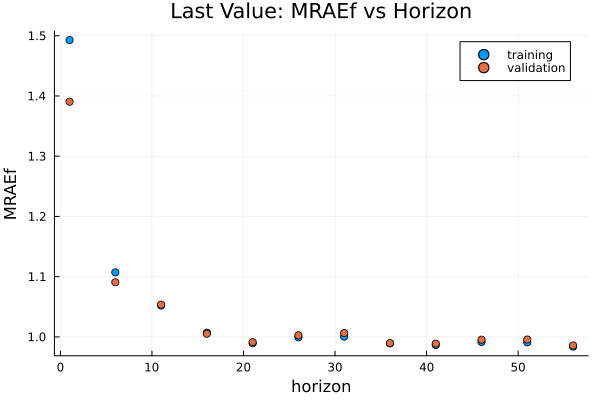

[ Info: Functions set
[ Info: Calculated on training set
[ Info: Calculated on validation set


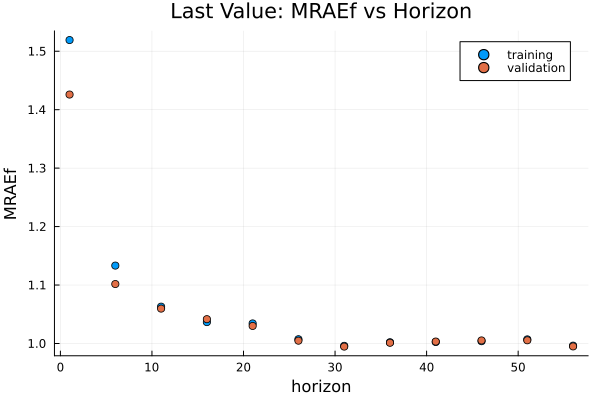

[ Info: Functions set
[ Info: Calculated on training set
[ Info: Calculated on validation set


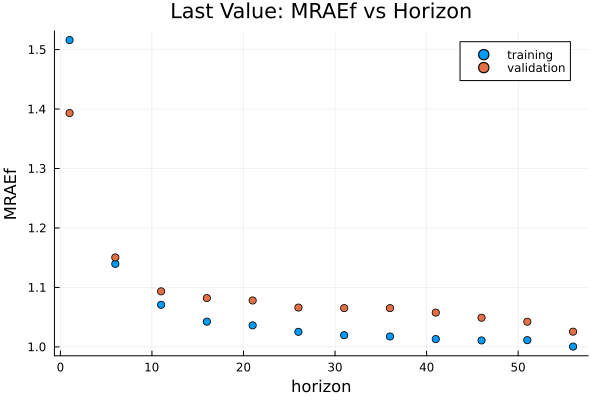

In [29]:
for maxSimIter = [20,30,60]#]#,
    rscope = "Forecast"
    LV_obj(params) = generic_Œº_MAE_obj(params, LV_param_order; 
        extra=LV_extra, maxSimIter=maxSimIter, warmUpData=returnHistoryWarmUp,
        simEvents=trainingEvents, data=data[data.date .>= trainingEvents[1].date,:],relative_scope=rscope, target_data=train_ŒºFcastMat)

    LV_obj_val(params) = generic_Œº_MAE_obj(params, LV_param_order; 
        extra=LV_extra, maxSimIter=maxSimIter, warmUpData=returnHistoryStartData_Validation,
        simEvents=validationEvents, data=data[data.date .>= validationEvents[1].date,:], relative_scope=rscope, target_data=val_ŒºFcastMat)

    range = 1:5:60
    @info "Functions set"
    errorVsHorizon_LV = [LV_obj([i]) for i=range]
    @info "Calculated on training set"
    errorValVsHorizon_LV = [LV_obj_val([i]) for i=range]
    @info "Calculated on validation set"
    using Plots:scatter, savefig,scatter!
    plotd=scatter(range, errorVsHorizon_LV, title="Last Value: MRAEf vs Horizon", xlabel="horizon",ylabel="MRAEf",label="training")
    scatter!(range, errorValVsHorizon_LV, label="validation")
    fig_dir = joinpath(@__DIR__, "figures")
    savefig(plotd,joinpath(fig_dir,"E1_01_LV_Optimization_$(maxSimIter)_days_MRAEf.svg"))
    display(plotd)
end

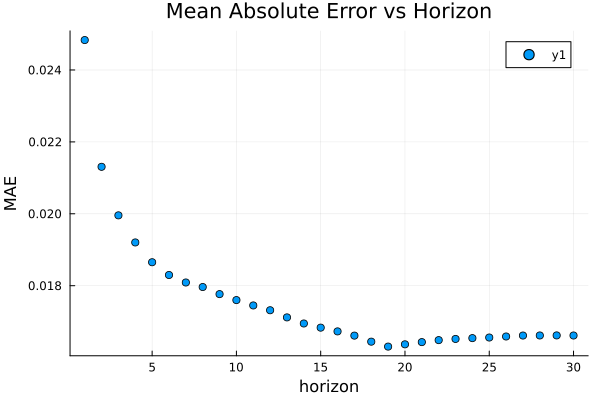

In [15]:
using Plots:scatter, savefig
plotd=scatter(1:30, errorVsHorizon_LV, title="Mean Absolute Error vs Horizon", xlabel="horizon",ylabel="MAE")
savefig(plotd,joinpath(fig_dir,"E1_01_LV_Optimization.svg"))
display(plotd)

### Tuning of Linear Regression

In [31]:
LR_extra = Dict(     
    "futureHorizon"=>futureHorizon, 
    "elementWise"=>true, # Forecast each company independently
    "symbolOrder"=>deepcopy(traded_assets),
    "forcastFunction"=>LR_Forecast,
    "forecastResult"=>[], 
    "varianceWindowSize"=>0,
)
LR_param_opt_config = Dict(
    "expectedReturnWindowSize"=>Dict("from"=>0,"to"=>30,"granularity"=>1,"initialValue"=>8),
    "pastHorizon"=>Dict("from"=>0,"to"=>60,"granularity"=>1,"initialValue"=>7),
)

LR_param_order= string.(collect(keys(LR_param_opt_config)))
@info "Optimizing Parameters" LR_param_opt_config

maxSimIter=20
# LR_obj(params) = generic_Œº_MAE_obj(params, LR_param_order; extra=LR_extra)
LR_obj(params) = generic_Œº_MAE_obj(params, LR_param_order; 
        extra=LR_extra, maxSimIter=maxSimIter, warmUpData=returnHistoryWarmUp,
        simEvents=trainingEvents, data=data[data.date .>= trainingEvents[1].date,:],relative_scope=rscope, target_data=train_ŒºFcastMat)

LR_optimal_params = optimize_parameters(LR_obj,LR_param_opt_config; param_keys = LR_param_order)
@info "Optimal Parameters" LR_optimal_params

‚îå Info: Optimizing Parameters
‚îÇ   LR_param_opt_config =
‚îÇ    Dict{String, Dict{String, Int64}} with 2 entries:
‚îÇ      "pastHorizon"              => Dict("granularity"=>1, "initialValue"=>7, ‚Ä¶
‚îî      "expectedReturnWindowSize" => Dict("granularity"=>1, "initialValue"=>8, ‚Ä¶


MADS Run Summary
------------------------------------------------
Feasible Solution           [21.0, 17.0]
Feasible Cost               0.9777365493765949
Infeasible Solution         nothing
Infeasible Cost             nothing

Iterations                  72
Function Evaluations        66
Cache hits                  219
Optimization Status         Mesh Precision limit

Runtime                     303.73638701438904
Search Time                 9.900000000000009e-6
Poll Time                   0.0063331
Blackbox Evaluation Time    242.6324302999988


‚îå Info: Optimal Parameters
‚îÇ   LR_optimal_params =
‚îÇ    2-element Vector{Float64}:
‚îÇ     21.0
‚îî     17.0


##### Produce Figures for report on error vs parameter value on 3 sample sizes

In [32]:
LR_param_order

2-element Vector{String}:
 "pastHorizon"
 "expectedReturnWindowSize"

In [34]:

expectedReturnWindowSize_s = [1  5 10 15 20 30] #:5:60
pastHorizon_s = [2 5 10 15 20 30]
errorVsHorizon_LR =zeros(length(expectedReturnWindowSize_s),length(pastHorizon_s))
errorValVsHorizon_LR =zeros(length(expectedReturnWindowSize_s),length(pastHorizon_s))
for maxSimIter = [20]#,30,60]
    rscope = "Forecast"
    LR_obj(params) = generic_Œº_MAE_obj(params, LR_param_order; 
        extra=LR_extra, maxSimIter=maxSimIter, warmUpData=returnHistoryWarmUp,
        simEvents=trainingEvents, data=data[data.date .>= trainingEvents[1].date,:],relative_scope=rscope, target_data=train_ŒºFcastMat)

    LR_obj_val(params) = generic_Œº_MAE_obj(params, LR_param_order; 
        extra=LR_extra, maxSimIter=maxSimIter, warmUpData=returnHistoryStartData_Validation,
        simEvents=validationEvents, data=data[data.date .>= validationEvents[1].date,:], relative_scope=rscope, target_data=val_ŒºFcastMat)

    @info "Functions set"
    for  i=1:length(expectedReturnWindowSize_s), j=1:length(pastHorizon_s)
        expectedReturnWindowSize= expectedReturnWindowSize_s[i]
        pastHorizon = pastHorizon_s[j]
        errorVsHorizon_LR[i,j] = LR_obj([pastHorizon expectedReturnWindowSize])
        errorValVsHorizon_LR[i,j] = LR_obj_val([pastHorizon expectedReturnWindowSize])
        @info "[$(expectedReturnWindowSize), $(pastHorizon)] : $(errorVsHorizon_LR[i,j]), $(errorValVsHorizon_LR[i,j])"
    end
    errorVsHorizon_LR = [[LR_obj([i j]) for i=expectedReturnWindowSize_s] for j=pastHorizon_s]
    @info "Calculated on training set"
    errorValVsHorizon_LR = [[LR_obj_val([i j ]) for i=expectedReturnWindowSize_s] for j=pastHorizon_s]
    @info "Calculated on validation set"
    using Plots:scatter, savefig,scatter!
    plotd=scatter(range, errorVsHorizon_LV, title="Last Value: MRAEf vs Horizon", xlabel="horizon",ylabel="MRAEf",label="training")
    scatter!(range, errorValVsHorizon_LV, label="validation")
    fig_dir = joinpath(@__DIR__, "figures")
    savefig(plotd,joinpath(fig_dir,"E1_01_LR_Optimization_$(maxSimIter)_days_MRAEf.svg"))
    display(plotd)
    for i = 1:length(expectedReturnWindowSize_s)
        @info "expectedReturnWindowSize: $(expectedReturnWindowSize_s[i])"
        plotd = scatter(pastHorizon_s[:], errorVsHorizon_LR[i,:], title="Linear Regression: MRAEf vs Horizon", xlabel="horizon",ylabel="MRAEf",label="training - $(expectedReturnWindowSize_s[i])")
        scatter!(pastHorizon_s[:], errorValVsHorizon_LR[i,:], label="validation - $(expectedReturnWindowSize_s[i])")
        savefig(plotd,joinpath(fig_dir,"E1_01_LR_Optimization_expectedReturnWindowSize_$(expectedReturnWindowSize_s[i])_$(maxSimIter)_days_MRAEf.svg"))
        display(plotd)
    end
end

[ Info: Functions set
[ Info: [1, 2] : 6.771885344475016, 6.23101813225427
[ Info: [1, 5] : 2.496915155058229, 2.1701012068068986
[ Info: [1, 10] : 1.6373803941422909, 1.450347257863957
[ Info: [1, 15] : 1.3652789261278486, 1.2547066888171658
[ Info: [1, 20] : 1.2020148996397158, 1.1663720149860604
[ Info: [1, 30] : 1.1005467640362596, 1.0762880418079623
[ Info: [5, 2] : 1.9163782543340993, 1.7218304417998482
[ Info: [5, 5] : 1.582510456656229, 1.4425353318500467
[ Info: [5, 10] : 1.4627363443554295, 1.2931346623386957
[ Info: [5, 15] : 1.2862970330499948, 1.1919188375710388
[ Info: [5, 20] : 1.1646787329575412, 1.125985560997463
[ Info: [5, 30] : 1.0968482008138838, 1.0794856836091828
[ Info: [10, 2] : 1.3543040359039729, 1.2553885121663406
[ Info: [10, 5] : 1.2338396116027688, 1.156095363490553
[ Info: [10, 10] : 1.2039541413125163, 1.1385710740783141
[ Info: [10, 15] : 1.1565998398917434, 1.112342887704466
[ Info: [10, 20] : 1.1103418457518328, 1.0798684127855829
[ Info: [10, 30] : 

LoadError: LinearAlgebra.SingularException(2)

[ Info: expectedReturnWindowSize: 1


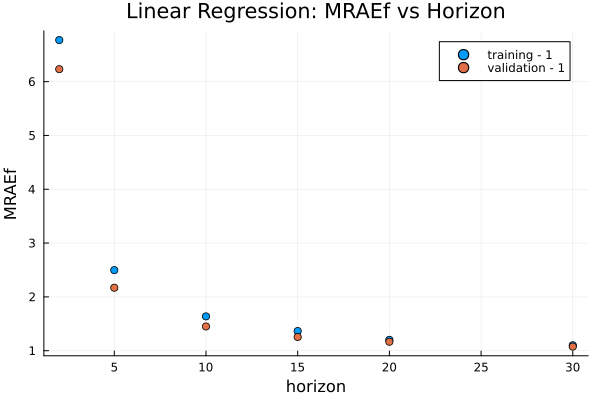

[ Info: expectedReturnWindowSize: 5


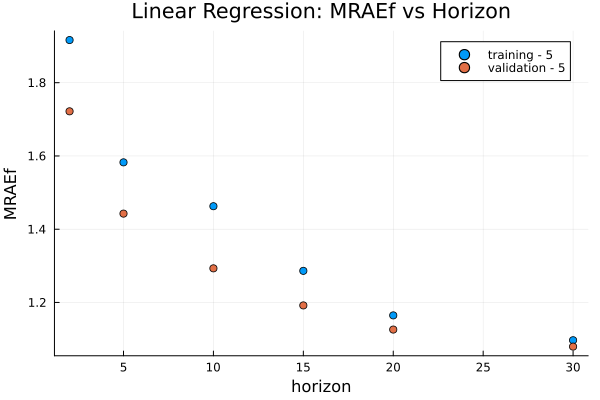

[ Info: expectedReturnWindowSize: 10


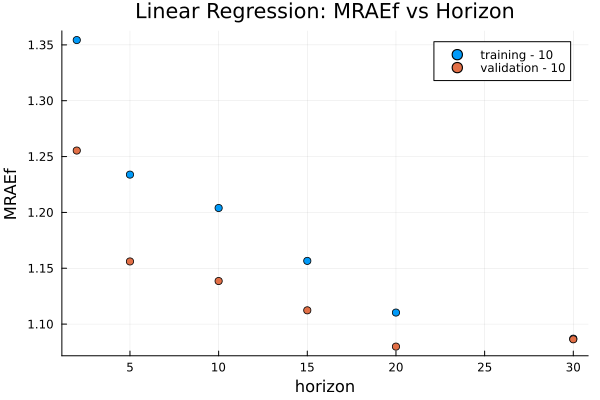

[ Info: expectedReturnWindowSize: 15


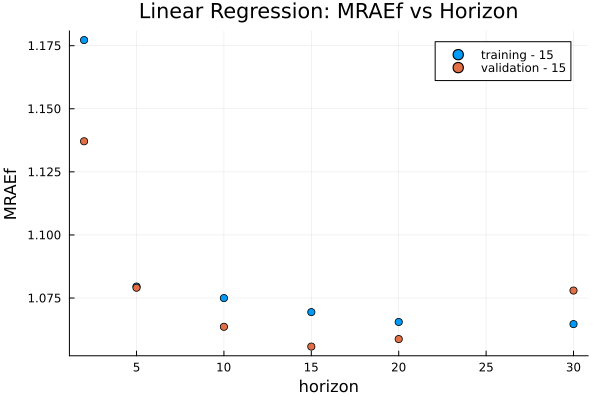

[ Info: expectedReturnWindowSize: 20


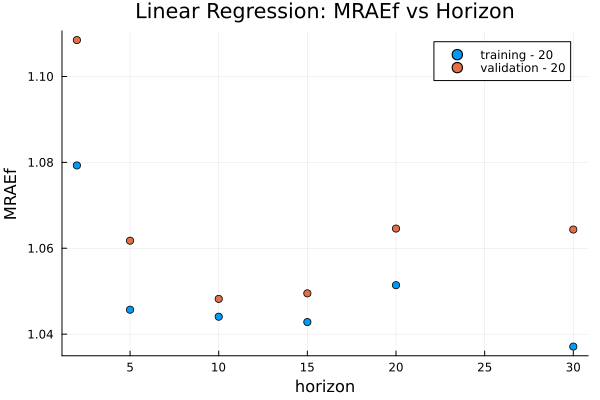

[ Info: expectedReturnWindowSize: 30


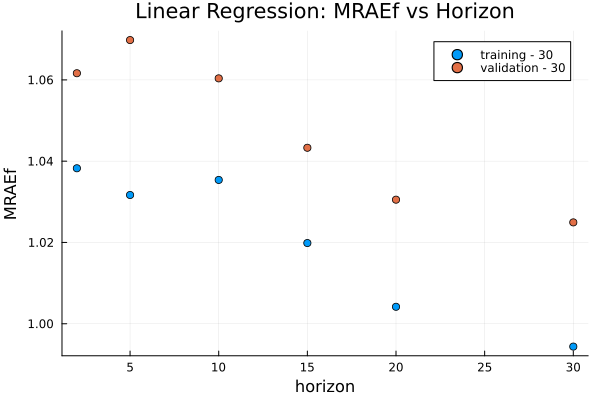

In [35]:
    for i = 1:length(expectedReturnWindowSize_s)
        @info "expectedReturnWindowSize: $(expectedReturnWindowSize_s[i])"
        plotd = scatter(pastHorizon_s[:], errorVsHorizon_LR[i,:], title="Linear Regression: MRAEf vs Horizon", xlabel="horizon",ylabel="MRAEf",label="training - $(expectedReturnWindowSize_s[i])")
        scatter!(pastHorizon_s[:], errorValVsHorizon_LR[i,:], label="validation - $(expectedReturnWindowSize_s[i])")
        savefig(plotd,joinpath(fig_dir,"E1_01_LR_Optimization_expectedReturnWindowSize_$(expectedReturnWindowSize_s[i])_$(maxSimIter)_days_MRAEf.svg"))
        display(plotd)
    end

### Tuning of behavioural

In [40]:
BH_extra = Dict(     
    "futureHorizon"=>futureHorizon, 
    "elementWise"=>true, # Forecast each company independently
    "symbolOrder"=>deepcopy(traded_assets),
    "forcastFunction"=>behaviouralForecast,
    "forecastResult"=>[], 
    "varianceWindowSize"=>0,
    "expectedReturnWindowSize"=>1, 
    "excludeCurrencyFromCalculation"=>true, # Behavioural & HMM: Reduce dimensionality of problem by 1
)

BH_param_opt_config = Dict(
    "pastHorizon"=>Dict("from"=>2,"to"=>60,"granularity"=>1,"initialValue"=>4),
)

rscope = "Forecast"
BH_param_order= string.(collect(keys(BH_param_opt_config)))
BH_obj(params) = generic_Œº_MAE_obj(params, BH_param_order; 
        extra=BH_extra, maxSimIter=20, warmUpData=returnHistoryWarmUp,
        simEvents=trainingEvents, data=data[data.date .>= trainingEvents[1].date,:], target_data=train_ŒºFcastMat, relative_scope=rscope)


BH_obj (generic function with 1 method)

In [41]:
@info "Optimizing Parameters" BH_param_order
BH_optimal_params = optimize_parameters(BH_obj,
    BH_param_opt_config; param_keys = BH_param_order)
@info "Optimal Parameters" BH_optimal_params

‚îå Info: Optimizing Parameters
‚îÇ   BH_param_order =
‚îÇ    1-element Vector{String}:
‚îî     "pastHorizon"


MADS Run Summary
------------------------------------------------
Feasible Solution           [4.0]
Feasible Cost               3.3340623628811286
Infeasible Solution         nothing
Infeasible Cost             nothing

Iterations                  50
Function Evaluations        3
Cache hits                  98
Optimization Status         Mesh Precision limit

Runtime                     25.693917989730835
Search Time                 7.199999999999995e-6
Poll Time                   0.0018072
Blackbox Evaluation Time    17.25602199999997


‚îå Info: Optimal Parameters
‚îÇ   BH_optimal_params =
‚îÇ    1-element Vector{Float64}:
‚îî     4.0


[ Info: Functions set: Behavioural
[ Info: [ 2] : 2.8122714301731007, 2.024839175873302
[ Info: [ 5] : 40.84496617564918, 9.53805944867871
[ Info: [ 10] : 7.455575859037843, 2.9799917190516965
[ Info: [ 15] : 129.19889027904955, 3.1010562969235234
[ Info: [ 20] : 22.13373477052711, 5.13279161903069
[ Info: [ 25] : 11.40996570152762, 19.38344092042024
[ Info: [ 30] : 7.881171384905876, 7.608265437358417
[ Info: [ 35] : 14.130601440408585, 7.1138409157596065
[ Info: [ 40] : 0.21313209198926258, 0.23966798901173594
[ Info: [ 45] : 0.21313209198926647, 0.23966798901174688
[ Info: [ 50] : 0.21313209198926977, 0.23966798901174505


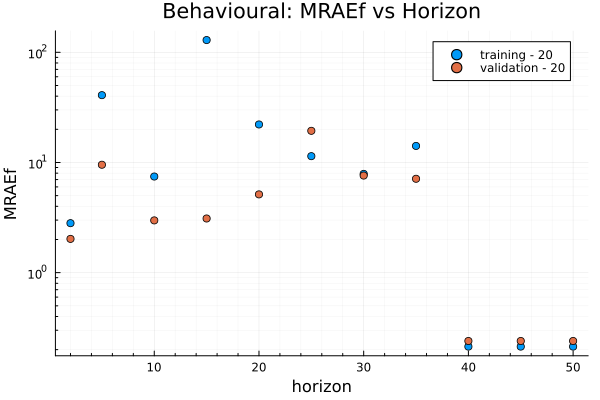

[ Info: Functions set: Behavioural
[ Info: [ 2] : 4.022238519248284, 6.929289558960651
[ Info: [ 5] : 7.348140292194032, 34.68655684639664
[ Info: [ 10] : 12.008742056491423, 13.43936556207386
[ Info: [ 15] : 23.78102530202442, 26.049302969868197
[ Info: [ 20] : 46.521042778630466, 7.527227526402584
[ Info: [ 25] : 42.08333751382074, 10.812713393219926
[ Info: [ 30] : 10.197976145590376, 10.91012876750584
[ Info: [ 35] : 28.36364387992266, 11.001467048185392
[ Info: [ 40] : 44.141394730039124, 29.54766518006315
[ Info: [ 45] : 63.71127706946127, 75.30290725011686
[ Info: [ 50] : 118.48829918249686, 72.49907990541031


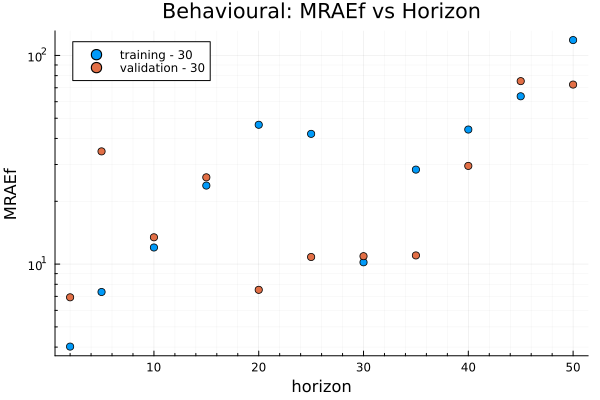

[ Info: Functions set: Behavioural
[ Info: [ 2] : 3.4963331734119785, 7.449864980756203
[ Info: [ 5] : 5.336374319710126, 55.0764710432294
[ Info: [ 10] : 29.366239716019674, 8.60871204092488
[ Info: [ 15] : 15.197480129735485, 8.85481800323391
[ Info: [ 20] : 32.395772506226734, 42.79526694019814
[ Info: [ 25] : 34.36628077518371, 39.91211532337262
[ Info: [ 30] : 7.2442551836308615, 21.9568687518095
[ Info: [ 35] : 14.497547047188874, 37.81903706421702
[ Info: [ 40] : 21.205333476194696, 8.932172618566128
[ Info: [ 45] : 37.44525224001636, 11.677868851723087
[ Info: [ 50] : 113.27113376517215, 5.376462866989184


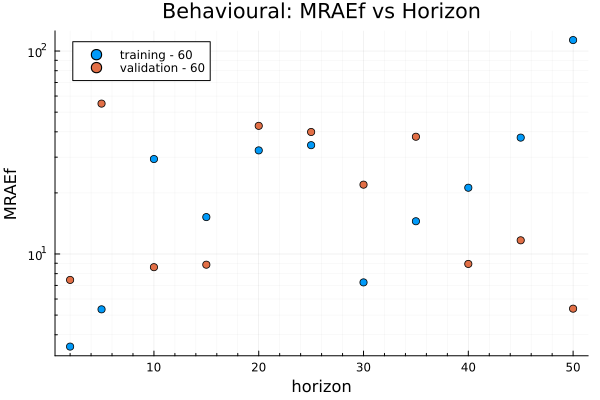

[ Info: Done


In [43]:

pastHorizon_s = [ 2 5 10 15 20 25 30 35 40 45 50]
errorVsHorizon_BH =zeros(length(pastHorizon_s))
errorValVsHorizon_BH =zeros(length(pastHorizon_s))
for maxSimIter = [20,30,60]
    rscope = "Forecast"
    BH_obj(params) = generic_Œº_MAE_obj(params, BH_param_order; 
        extra=BH_extra, maxSimIter=maxSimIter, warmUpData=returnHistoryWarmUp,
        simEvents=trainingEvents, data=data[data.date .>= trainingEvents[1].date,:],relative_scope=rscope, target_data=train_ŒºFcastMat)

    BH_obj_val(params) = generic_Œº_MAE_obj(params, BH_param_order; 
        extra=BH_extra, maxSimIter=maxSimIter, warmUpData=returnHistoryStartData_Validation,
        simEvents=validationEvents, data=data[data.date .>= validationEvents[1].date,:], relative_scope=rscope, target_data=val_ŒºFcastMat)
    @info "Functions set: Behavioural"
    for j=1:length(pastHorizon_s)
        pastHorizon = pastHorizon_s[j]
        errorVsHorizon_BH[j] = BH_obj([pastHorizon ])
        errorValVsHorizon_BH[j] = BH_obj_val([pastHorizon ])
        @info "[ $(pastHorizon)] : $(errorVsHorizon_BH[j]), $(errorValVsHorizon_BH[j])"
    end
    plotd = scatter(pastHorizon_s[:], errorVsHorizon_BH[:], title="Behavioural: MRAEf vs Horizon", xlabel="horizon",ylabel="MRAEf",label="training - $(maxSimIter)", yscale=:log10, minorgrid=true)
    scatter!(pastHorizon_s[:], errorValVsHorizon_BH[:], label="validation - $(maxSimIter)")
    savefig(plotd,joinpath(fig_dir,"E1_01_BH_Optimization_$(maxSimIter)_days_MRAEf.svg"))
    display(plotd)
end
@info "Done"

### Tuning of Hidden Markov Model
HMM uses a long horizon of data to estimate fit the probability distributions of market regimes as well as the transition probability between states.

The parameter to optimize in this case would be the number of states and amount of data fed to calibrate it and the frequency of recalibration of the MMM distributions. 

Due to the large amounts of data required for this method, and the publication giving evidence that 2 states were enough to model equity returns the tuning for this method is skipped.

### Comparison of forecast methods
Here the previous methods (already tuned) will be compared against each other in terms of their mean relative and absolute error on the forecast domain.

In [145]:
# Parameters and Extras
BH_extra = Dict(     
    "futureHorizon"=>futureHorizon, 
    "elementWise"=>true, # Forecast each company independently
    "symbolOrder"=>deepcopy(traded_assets),
    "forcastFunction"=>behaviouralForecast,
    "forecastResult"=>[], 
    "varianceWindowSize"=>0,
    "expectedReturnWindowSize"=>1, 
    "excludeCurrencyFromCalculation"=>true, # Behavioural & HMM: Reduce dimensionality of problem by 1
)

BH_param = Dict(
    "pastHorizon"=>4
)

LR_extra = Dict(     
    "futureHorizon"=>futureHorizon, 
    "elementWise"=>true, # Forecast each company independently
    "symbolOrder"=>deepcopy(traded_assets),
    "forcastFunction"=>LR_Forecast,
    "forecastResult"=>[], 
    "varianceWindowSize"=>0,
)
LR_param = Dict(
    "expectedReturnWindowSize"=>19,
    "pastHorizon"=>8,
)


LV_extra = Dict(     
    "futureHorizon"=>futureHorizon, 
    "symbolOrder"=>deepcopy(traded_assets),
    "forcastFunction"=>LV_Forecast,
    "forecastResult"=>[], 
    "varianceWindowSize"=>0,
)

LV_param = Dict(
    "expectedReturnWindowSize"=>58,
)

HMM_extra = Dict( 
    "futureHorizon"=>futureHorizon, # 
    "symbolOrder"=>deepcopy(traded_assets),
    "forcastFunction"=>hmmForecast,
    "hmm"=>nothing, # Initial Hidden Markov Model
    "obs_seq"=>[], # Initial Warm-Start Data
    "lastScanIx"=>1, # Index to keep track of not yet ingested data.
    "excludeCurrencyFromCalculation"=>true, # Behavioural & HMM: Reduce dimensionality of problem by 1
    "forecastResults"=>[], 
)

HMM_param = Dict( 
    "recalibrationPeriod"=>50 # Index to keep track of not yet ingested data.
)

function generic_Œº_MAE_obj_perDomain(extra, param; 
        relative_scope=nothing, maxSimIter=20, warmUpData=returnHistoryWarmUp,
        simEvents=trainingEvents, data=data,target_data=target_data) 
    # Produce forecast
    init!(context) =  general_initialize!(context,extra,param; returnHistoryStartData=returnHistoryWarmUp)
    context = DEDS.run(data, init!, forcastTradingLogic!,my_execute_orders!,my_expose_data; verbose=false, audit=true, max_iter=maxSimIter, initialEvents=deepcopy(simEvents))
    
    # Structure result and fetch target values
    ŒºFcastMat=produce_ŒºFcastMat(context)
    N = size(ŒºFcastMat)[3] # Forecast instances
    D = size(ŒºFcastMat)[2] # Domain length
    A = size(ŒºFcastMat)[1] # Number of assets
    
    # @info " FcastMat Dimensions" N D A
    
    target = target_data[:,:,1:N] # Array structure: AssetIx - Forcast domain - Forecast instance
    N1(x)  = sum(abs.(x)) # Norm-1
    errorVec = zeros(D)
    
    for e_ix=1:D
        if isnothing(relative_scope)
            errorVec[e_ix] = mean(
                [N1(ŒºFcastMat[:,e_ix,:]-target[:,e_ix,:]) for i=1:N])  # Not scaled
        elseif relative_scope == "All" 
            errorVec[e_ix] = mean([N1(ŒºFcastMat[:,e_ix,:]-target[:,e_ix,:]) ./ N1(target[:,e_ix,:]) for i=1:N])
        elseif relative_scope == "Forecast" 
            errorVec[e_ix] =  mean([N1(ŒºFcastMat[:,e_ix,i]-target[:,e_ix,i]) ./ N1(target[:,e_ix,i]) for i=1:N])
        end
    end 
    return errorVec
end

# HMM_vs_days = vsDayFun(HMM_extra, HMM_param)

# generic_Œº_MAE_obj_perDomain(extra, param; relative_scope=nothing, maxSimIter=20, warmUpData=returnHistoryWarmUp,
        # simEvents=trainingEvents, data=data,target_data=target_data) 


generic_Œº_MAE_obj_perDomain (generic function with 1 method)

In [155]:
maxSimIter=length(validationEvents)
rscope="Forecast"
vsDayFun(extra,param) = generic_Œº_MAE_obj_perDomain(extra, param; maxSimIter=maxSimIter, warmUpData=returnHistoryStartData_Validation,
        simEvents=validationEvents, data=data[data.date .>= validationEvents[1].date,:], relative_scope=rscope, target_data=val_ŒºFcastMat)
LV_vs_days = vsDayFun(LV_extra, LV_param)
LR_vs_days = vsDayFun(LR_extra, LR_param)
BH_vs_days = vsDayFun(BH_extra, BH_param)


7-element Vector{Float64}:
 14.190730361787153
 20.680426380238796
 12.643230101545145
 16.27646610486814
 15.950298955359512
 22.00935394654639
 13.371637946343293

In [166]:

HMM_extra = Dict( 
    "futureHorizon"=>futureHorizon, # 
    "symbolOrder"=>deepcopy(traded_assets),
    "forcastFunction"=>hmmForecast,
    "hmm"=>nothing, # Initial Hidden Markov Model
    "obs_seq"=>[], # Initial Warm-Start Data
    "lastScanIx"=>1, # Index to keep track of not yet ingested data.
    "excludeCurrencyFromCalculation"=>true, # Behavioural & HMM: Reduce dimensionality of problem by 1
    "forecastResults"=>[], 
)
# Recalibration pt
HMM_param = Dict( 
    "recalibrationPeriod"=>50 # Index to keep track of not yet ingested data.
)
HMM_vs_days = vsDayFun(HMM_extra, HMM_param)

7-element Vector{Float64}:
 0.9924285509249369
 0.9924840669074775
 0.9934058366987686
 0.9958266769547038
 0.9963861545268017
 0.9953751029954466
 0.9932809164538569

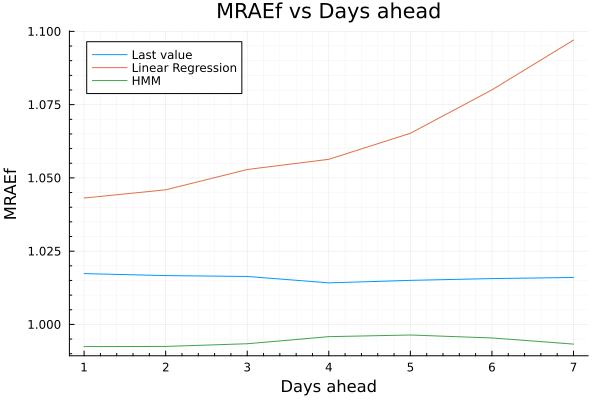

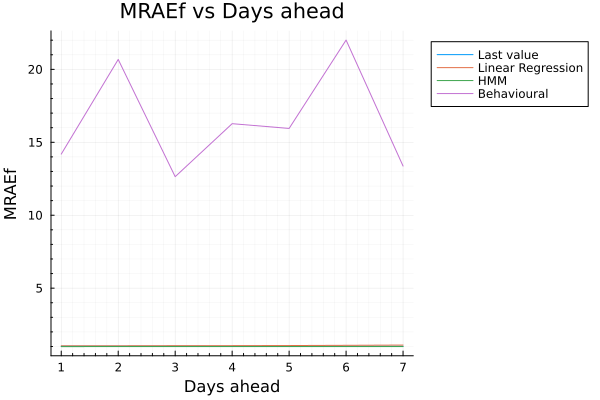

In [169]:
using Plots: plot, plot!
plotd = plot(1:futureHorizon,LV_vs_days,label="Last value",title="MRAEf vs Days ahead", xlabel="Days ahead", ylabel="MRAEf",  minorgrid=true)
plot!(1:futureHorizon,LR_vs_days,label="Linear Regression")
plot!(1:futureHorizon,HMM_vs_days,label="HMM")
savefig(plotd,joinpath(fig_dir,"E1_01_kethodComparison_wo_BH.svg"))
display(plotd)
plot!(1:futureHorizon,BH_vs_days,label="Behavioural",legend=:outertopright)
savefig(plotd,joinpath(fig_dir,"E1_01_kethodComparison.svg"))
display(plotd)


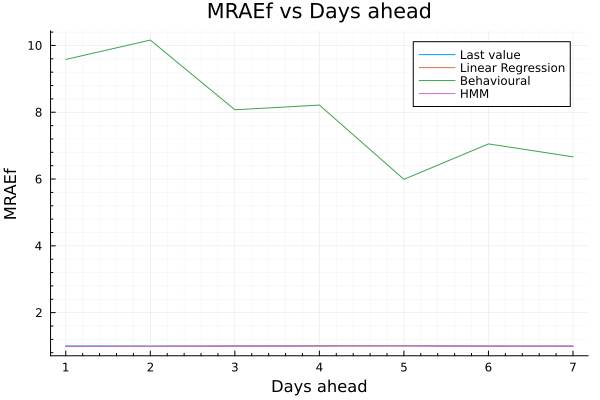

In [150]:
using Plots: plot, plot!
plotd = plot(1:futureHorizon,LV_vs_days,label="Last value",title="MRAEf vs Days ahead", xlabel="Days ahead", ylabel="MRAEf", minorgrid=true)
plot!(1:futureHorizon,LR_vs_days,label="Linear Regression")
plot!(1:futureHorizon,BH_vs_days,label="Behavioural")
plot!(1:futureHorizon,HMM_vs_days,label="HMM")



# Backtesting
Now we shall compare the performance of each method by running a simulation over time of them using the AirBorne DEDS simulation engine with a customized trading logic method that solely performs the forecasting on each simulation event.

In [171]:

using AirBorne.Markets.StaticMarket: execute_orders!, expose_data, executeOrder_CA!

dollar_symbol = "FEX/USD"
feeStructure=Vector{Dict}([Dict("FeeName" => "SaleCommission", "fixedPrice" => 0.0, "variableRate" => 0.02)])

### Market Operations
# In this strategy we want to reflect the money in our accounts in the portfolio composition
# And by default a 2% fee commission is going to be taken from each sale
singleExecutionFun(context, order, data) = executeOrder_CA!(context, order, data;defaultFeeStructures=feeStructure,partialExecutionAllowed=false)
my_execute_orders!(context, data) = execute_orders!(context, data; propagateBalanceToPortfolio=true, executeOrder=singleExecutionFun)
my_expose_data(context,data) = expose_data(context,data; historical=false)

# MPC problem with horizon 7, 2% commission cost on sale, and total disregard of quadratic terms
core_MPC_parameters = Dict()
core_MPC_extras= Dict("futureHorizon"=>7,"propCost"=>0.02,"riskWeight"=>0.0, "symbolOrder" => collect(unique(data.assetID)))
evaluationEvents = deepcopy(backtestingEvents)

# PostProcessing Data
using AirBorne.Structures: summarizePerformance
using Plots: plot
usdData = deepcopy(data[data.assetID .== traded_assets[1], :])
usdData[!, "assetID"] .= dollar_symbol
usdData[!, "exchangeName"] .= "FEX"
usdData[!, "symbol"] .= "USD"
usdData[!, [:close, :high, :low, :open]] .= 1.0
usdData[!, [:volume]] .= 0
OHLCV_data = vcat(data, usdData)
@info "Backtesting common parameters defined"

[ Info: Backtesting common parameters defined


In [172]:
# MPC Trading logic
using AirBorne.Utils: sortedStructInsert!, rvcat, rblockdiag
using AirBorne.Structures: ContextTypeA, c_get
using AirBorne.Markets.StaticMarket: Order, place_order!, ordersForPortfolioRedistribution
using AirBorne.ETL.AssetValuation: stockValuation, returns, covariance

# External Dependencies
using Dates: DateTime
using DataFrames: DataFrame
using DotMaps: DotMap
using JuMP:
    @variable, @expression, Model, @objective, @constraint, optimize!, @NLobjective, value, set_silent
using SparseArrays: sparse, I, spdiagm
using Ipopt: Ipopt
import MathOptInterface as MOI


function MPC_tradingLogic!(context, data; forecastFun::Function=perfectForecastReturns)
    ####  Update data  ####
    if size(data, 1) == 0 # No New data, nothing to do
        return nothing
    end
    context.extra.pastValue = context.extra.currentValue

    context.extra.currentValue = stockValuation(data)
    context.extra.currentValue[!, context.extra.currency_symbol] .= 1.0 # Add currency to values

    [push!(context.extra.valueHistory, r) for r in eachrow(context.extra.currentValue)]

    if size(context.extra.pastValue, 1) > 0 # Add new data to history record
        r1 = returns(vcat(context.extra.pastValue, context.extra.currentValue))
        push!(context.extra.returnHistory, r1[end, :])
    end

    ####  MPC  ####
    if size(context.extra.returnHistory, 1) < context.extra.min_data_samples
        return nothing # Not enough history data to continue
    end

    # Forecasts
    meanVarianceForecast = forecastFun(context) # Returns a sequence of Return vectors and Covariance matrices

    # Matrices Definitions
    r = float.(rvcat([reshape(rV[1],:,1) for rV in meanVarianceForecast])) # Return Vector
    Q = rblockdiag([rV[2] for rV in meanVarianceForecast]) # Block diagonal with covariance matrices in the diagonal
    ùõæ_trade = c_get(context, "propCost", 0.05)
    ùõæ_risk = c_get(context, "riskWeight", 0.0)
    n_assets = length(context.extra.symbolOrder)
    T = c_get(context,"futureHorizon",7)
    B1 = kron(sparse(I, T, T), ones(1, n_assets)) # Matrix such that when multiplied by X, it returns a vector of ones of length T

    # Optimization Problem
    model = Model(Ipopt.Optimizer)
    set_silent(model)
    
    @variable(model, x[1:length(r)] >= 0)
    @variable(model, sum_portfolio_differences)
    @constraint(model,
        [sum_portfolio_differences; x[1:(end - n_assets)] - x[(n_assets + 1):end]
            ] in MOI.NormOneCone(1 + length(x) - n_assets)) # Norm-1
    @objective(model, Min, sum([-r[i] * x[i] for i=1:length(r)]) + ùõæ_trade * sum_portfolio_differences + ùõæ_risk * (x' * Q * x))
    @constraint(model, B1 * x .- ones(T, 1) .== 0)
    optimize!(model)
    sol = round.(value.(x)[1:n_assets]; digits=3) # Best next portfolio distribution

    # Decode solution into buy/sell orders
    assetPricing = context.extra.currentValue[1, "stockValue"]
    assetPricing[context.extra.currency_symbol] = 1.0
    orders = ordersForPortfolioRedistribution(
        convert(Dict{String,Float64}, context.portfolio),
        Dict([context.extra.symbolOrder[i] => sol[i] for i in 1:n_assets]),
        assetPricing;
        account=context.accounts.usd,
        curency_symbol=context.extra.currency_symbol,
        costPropFactor=ùõæ_trade,
    )
    [place_order!(context, order) for order in orders] # Place orders
    return nothing
end


MPC_tradingLogic! (generic function with 1 method)

## Perfect forecast backtest

In [176]:
PF_params = merge(core_MPC_parameters,Dict())
PF_extras = merge(core_MPC_extras,Dict())

# Define Perfect Forecasting Function
PF_forecastFun(context) = perfectForecastReturns(context,sr)
 
perfect_MPC_initialize!(context) = general_initialize!(context,PF_extras,PF_params; returnHistoryStartData=returnHistoryStartData_Backtest)  
perfect_MPC_TL!(context, data) = MPC_tradingLogic!(context, data; forecastFun=PF_forecastFun)

PF_Backtest_Context = DEDS.run(
        data,
        perfect_MPC_initialize!,
        perfect_MPC_TL!,
        my_execute_orders!,
        my_expose_data;
        audit=true,
        # max_iter=20, # Run for 100 business days
        verbose=true,
    initialEvents=deepcopy(backtestingEvents[1:end-7]),
    )

@info "Done"
     

[ Info: Done


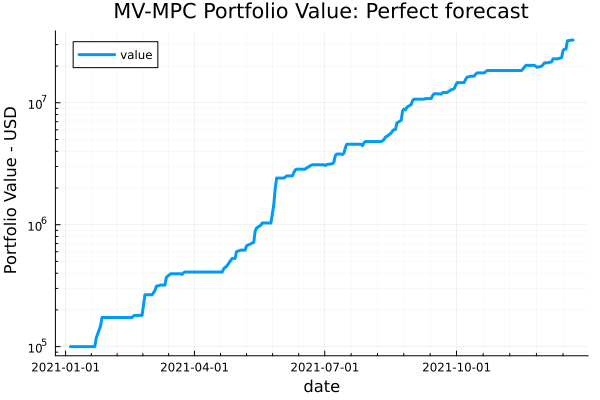

In [179]:
using Plots: plot, savefig, plot!

results = summarizePerformance(OHLCV_data, PF_Backtest_Context; includeAccounts=false)
plotd=plot(results.date[2:end], results.dollarValue[2:end], title="MV-MPC Portfolio Value: Perfect forecast", label="value",xlabel="date",ylabel=" Portfolio Value - USD", linewidth=3, yscale=:log10, minorgrid=true)
     
fig_dir = joinpath(@__DIR__, "figures")
savefig(plotd,joinpath(fig_dir,"E1_02_PF_Forecast.svg"))
display(plotd)


### Last Value forecast - MPC backtest

**Last Value** can also provide an estimation of the covariance matrix, therefore a sense of risk as a variability of the prediction can be applied. Therefore the riskWeight will be passed as a parameter. 

In [ ]:
values(LV_params)

In [190]:

LV_params = merge(core_MPC_parameters,Dict(
        "riskWeight"=>0.4,
        "varianceWindowSize"=>59,
        "expectedReturnWindowSize"=>50,
        ))
LV_extras = merge(core_MPC_extras,Dict())

LV_MPC_initialize!(context) = general_initialize!(context,LV_extras,LV_params; returnHistoryStartData=returnHistoryStartData_Backtest)  
LV_MPC_TL!(context, data) = MPC_tradingLogic!(context, data; forecastFun=LV_Forecast)

LV_Backtest_Context = DEDS.run(
        data,
        LV_MPC_initialize!,
        LV_MPC_TL!,
        my_execute_orders!,
        my_expose_data;
        audit=true,
        # max_iter=100, # Run for 100 business days
        verbose=true,
        initialEvents=deepcopy(evaluationEvents),
    )

@info "Done"

[ Info: Done


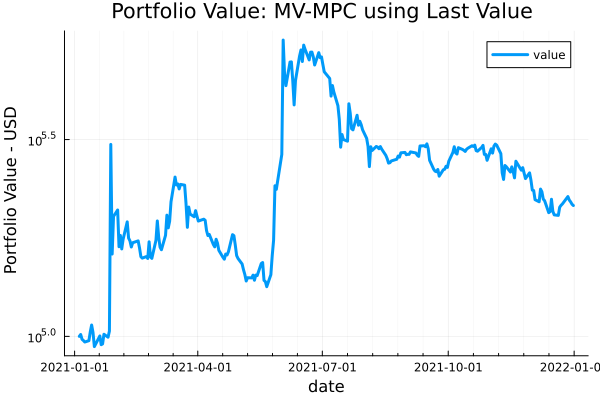

In [191]:
results = summarizePerformance(OHLCV_data, LV_Backtest_Context; includeAccounts=false)
plotd=plot(results.date[2:end], results.dollarValue[2:end], title="Portfolio Value: MV-MPC using Last Value ", label="value",xlabel="date",ylabel=" Portfolio Value - USD", linewidth=3, yscale=:log10, minorgrid=true)
     
fig_dir = joinpath(@__DIR__, "figures")
savefig(plotd,joinpath(fig_dir,"E1_02_LV_Forecast_.svg"))
display(plotd)

#### Hyperparameter optimization
Using the training period for backtesting the parameters for the variance and horizon can be optimized using the final dollar value of the portfolio as the objective function to be optimized

In [185]:

using AirBorne.ETL.AssetValuation: valuePortfolio
function generic_profit_obj(vec_params,param_keys_order, tradingLogic!,paramConfig; extra=Dict()) 
    maxSimIter=60 # Maximum days in simulation to evaluate parameters
    iteration_params = Dict([param_keys_order[i] => paramConfig[param_keys_order[i]]["parse"](vec_params[i]) for i=1:length(vec_params)])
    init!(context) =  general_initialize!(context,extra,iteration_params; returnHistoryStartData=returnHistoryWarmUp)
    #Run on train data
    context = DEDS.run(data, init!, tradingLogic!,my_execute_orders!,my_expose_data;
        verbose=false, audit=false, max_iter=maxSimIter, initialEvents=deepcopy(trainingEvents))
    final_value = valuePortfolio(context.portfolio, context.extra.currentValue[1,"stockValue"])
    @info "$(vec_params):$(final_value)"
    return -log10(final_value)
end





generic_profit_obj (generic function with 1 method)

In [189]:
LV_profit_param_order

3-element Vector{String}:
 "riskWeight"
 "varianceWindowSize"
 "expectedReturnWindowSize"

In [188]:

LV_profit_param_opt_config = Dict(
    "riskWeight"=>Dict("from"=>0,"to"=>5,"granularity"=>0.2,"initialValue"=>1.0, "parse"=>float), # Not interested in optimizing variance now ,
    "varianceWindowSize"=>Dict("from"=>0,"to"=>60,"granularity"=>1,"initialValue"=>58, "parse"=>Int), # Not interested in optimizing variance now
    "expectedReturnWindowSize"=>Dict("from"=>0,"to"=>60,"granularity"=>1,"initialValue"=>58, "parse"=>Int)
)

LV_profit_param_order= string.(collect(keys(LV_profit_param_opt_config)))

LV_profit_extra = merge(core_MPC_extras,Dict())
LV_MPC_TL!(context, data) = MPC_tradingLogic!(context, data; forecastFun=LV_Forecast)
LV_profit_obj(params) = generic_profit_obj(params, LV_profit_param_order, LV_MPC_TL!, LV_profit_param_opt_config; extra=LV_profit_extra)

LV_profit_optimal_params = optimize_parameters(LV_profit_obj,LV_profit_param_opt_config)

@info "Optimal Parameters" LV_profit_optimal_params LV_profit_param_order


[ Info: [1.0, 58.0, 58.0]:157058.74980704597
[ Info: [0.8, 60.0, 53.0]:97865.49427331556
[ Info: [1.0, 53.0, 55.0]:115741.3988222547
[ Info: [0.8, 59.0, 57.0]:110712.92130264739
[ Info: [1.2, 60.0, 58.0]:134569.0998560713
[ Info: [1.0, 58.0, 60.0]:166483.1657398089
[ Info: [1.2, 57.0, 59.0]:186799.72021781423
[ Info: [0.8, 56.0, 58.0]:111992.28295250461
[ Info: [1.0, 58.0, 56.0]:108992.11709061559
[ Info: [1.6, 55.0, 58.0]:144166.4159962862
[ Info: [1.0, 52.0, 58.0]:130546.2553144216
[ Info: [0.8, 59.0, 60.0]:165716.047937061
[ Info: [1.2, 58.0, 54.0]:103913.82915528226
[ Info: [1.4, 58.0, 59.0]:183511.79158399918
[ Info: [1.2, 59.0, 60.0]:172211.98231509308
[ Info: [1.0, 56.0, 59.0]:186913.46251012463
[ Info: [1.2, 58.0, 57.0]:121145.66551966988
[ Info: [1.2, 55.0, 58.0]:133699.41660539334
[ Info: [1.4, 56.0, 58.0]:138144.8641655285
[ Info: [0.8, 57.0, 57.0]:108825.25985701059
[ Info: [0.6, 56.0, 60.0]:163848.91569703718
[ Info: [1.0, 51.0, 59.0]:197117.867421482
[ Info: [1.4, 44.0, 5

MADS Run Summary
------------------------------------------------
Feasible Solution           [0.4, 50.0, 59.0]
Feasible Cost               -5.301370880252387
Infeasible Solution         nothing
Infeasible Cost             nothing

Iterations                  60
Function Evaluations        77
Cache hits                  270
Optimization Status         Mesh Precision limit

Runtime                     842.3327949047089
Search Time                 1.070000000000001e-5
Poll Time                   0.0120256
Blackbox Evaluation Time    832.8957915000053


[ Info: [0.6, 49.0, 60.0]:181596.13165033926
‚îå Info: Optimal Parameters
‚îÇ   LV_profit_optimal_params =
‚îÇ    3-element Vector{Float64}:
‚îÇ      0.4
‚îÇ     50.0
‚îî     59.0


##### Truncated Result

Given that the optimization method took too long to converge intermediate results were recorded below. Overall portfolio growths of around 1.5 can be seen with Expecations windows of 21 to 24, and variance windows larger than 6. The risk  factor seems to play a minor role, althought it may be a scaling issue.

| Risk | Variance Window | Expectation Window | Portfolio growth |
| --- | --- | --- | --- |
| 1.0 | 7.0 | 19.0 | 1.4095737111448199 |  
| 1.0 | 7.0 | 21.0 | 1.4613784532210163 |  
| 1.0 | 8.0 | 20.0 | 1.3989359669409043 |  
| 1.2 | 7.0 | 20.0 | 1.424935043454655  | 
| 1.0 | 7.0 | 17.0 | 1.1546552163248136 |  
| 1.0 | 6.0 | 18.0 | 1.1879620061791705 |  
| 0.8 | 7.0 | 18.0 | 1.1685441261639877 |  
| 1.2 | 7.0 | 21.0 | 1.4693113419942871 |  
| 1.0 | 6.0 | 26.0 | 1.198471065226556  | 
| 1.0 | 8.0 | 26.0 | 1.3045621820913584 |  
| 0.8 | 7.0 | 21.0 | 1.4810201159551426 |  
| 1.0 | 8.0 | 16.0 | 1.13090860299683   |
| 1.0 | 6.0 | 16.0 | 1.151857224939507  | 
| 0.4 | 8.0 | 21.0 | 1.4788212043341957 |  
| 1.2 | 8.0 | 21.0 | 1.47599216342706   |
| 0.8 | 7.0 | 26.0 | 1.2339418641463331 |  
| 1.2 | 6.0 | 21.0 | 1.485059371868302  | 
| 0.4 | 6.0 | 21.0 | 1.5617019542338717 |  
| 0.8 | 7.0 | 16.0 | 1.131773738364905  | 
| 1.0 | 4.0 | 18.0 | 1.17232769557884   |
| 1.4 | 6.0 | 26.0 | 1.1034357555336123 |  
| 1.2 | 8.0 | 17.0 | 1.1347626518522087 |  
| 0.6 | 7.0 | 20.0 | 1.346924415314058  | 
| 0.8 | 6.0 | 23.0 | 1.529751230308915  | 
| 0.2 | 7.0 | 23.0 | 1.6054889246995205 |  
| 0.2 | 5.0 | 22.0 | 1.6481386998558176 |  
| 0.0 | 6.0 | 19.0 | 1.529226290485336  | 
| 0.6 | 5.0 | 19.0 | 1.6508287601639382 |  
| 1.6 | 6.0 | 20.0 | 1.511041977871331  | 
| 1.0 | 3.0 | 15.0 | 1.1152817637556107 |  
| 0.8 | 3.0 | 24.0 | 1.4306552751559416 |  
| 0.4 | 7.0 | 14.0 | 1.180658754778854  | 
| 0.4 | 5.0 | 17.0 | 1.1246445078341345 |  
| 0.6 | 6.0 | 19.0 | 1.6078982854757322 |  
| 0.2 | 5.0 | 21.0 | 1.584344863351828  | 
| 0.8 | 5.0 | 21.0 | 1.4963483332408756 |  
| 0.6 | 4.0 | 19.0 | 1.6745567238637697 |  
| 1.0 | 5.0 | 17.0 | 1.1550441964345528 |  
| 1.0 | 5.0 | 19.0 | 1.639239329875483  | 
| 0.8 | 3.0 | 17.0 | 1.1464008268616437 |  
| 0.6 | 2.0 | 21.0 | 1.5493512331138761 |  
| 0.2 | 3.0 | 19.0 | 1.4845852316756687 |  
| 0.4 | 5.0 | 21.0 | 1.5133069490252062 |  
| 0.6 | 6.0 | 17.0 | 1.0987676133891302 |  
| 0.8 | 4.0 | 19.0 | 1.6773683052054869 |  
| 0.6 | 4.0 | 18.0 | 1.210109483816953  | 
| 0.6 | 3.0 | 19.0 | 1.5643202139613084 |  
| 0.4 | 4.0 | 19.0 | 1.6647471374804446 |  
| 0.6 | 4.0 | 20.0 | 1.3932321207232896 |  
| 0.6 | 3.0 | 18.0 | 1.190909241403082  | 
| 0.4 | 5.0 | 19.0 | 1.6005537801241143 |  
| 1.0 | 5.0 | 20.0 | 1.4497722411980258 |  
| 1.2 | 3.0 | 19.0 | 1.6317913224048368 |  
| 0.6 | 5.0 | 18.0 | 1.1762907975773267 |  
| 1.0 | 3.0 | 20.0 | 1.4470202766926958 |  
| 0.8 | 5.0 | 19.0 | 1.640106590286212  | 
| 0.8 | 3.0 | 19.0 | 1.6376439869211556 |  
| 0.8 | 3.0 | 20.0 | 1.4693367480117994 |  
| 0.8 | 5.0 | 18.0 | 1.1979945728611032 |  
| 1.0 | 4.0 | 19.0 | 1.6815487963828595 |  
| 0.8 | 4.0 | 18.0 | 1.2042202909320703 |  
| 0.8 | 4.0 | 20.0 | 1.4134875939794722 |  
| 1.4 | 4.0 | 20.0 | 1.446699876845205  | 
| 1.2 | 4.0 | 18.0 | 1.159834628645904  | 
| 1.2 | 4.0 | 19.0 | 1.687372378906131  | 

### Behavioural forecast - MPC Backtest

In [175]:

BH_params = merge(core_MPC_parameters,Dict(
        "pastHorizon"=>20
        ))
BH_extras = merge(core_MPC_extras,Dict())

BH_MPC_initialize!(context) = general_initialize!(context,BH_extras, BH_params; returnHistoryStartData=returnHistoryStartData_Backtest)  
BH_MPC_TL!(context, data) = MPC_tradingLogic!(context, data; forecastFun=behaviouralForecast)

BH_Backtest_Context = DEDS.run(
        data,
        BH_MPC_initialize!,
        BH_MPC_TL!,
        my_execute_orders!,
        my_expose_data;
        audit=true,
        max_iter=20, # Run for 100 business days
        verbose=true,
        initialEvents=deepcopy(evaluationEvents),
    )

@info "Done"

[ Info: Done


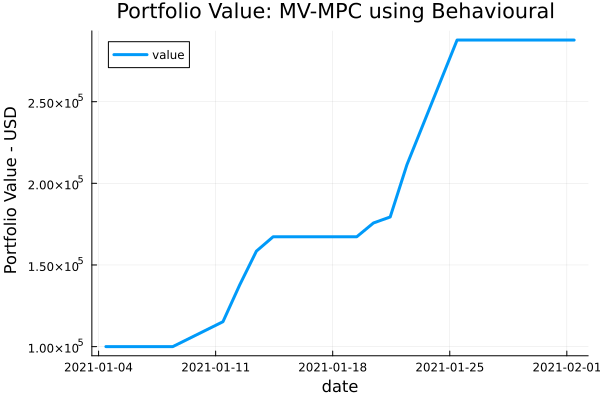

In [176]:
results = summarizePerformance(OHLCV_data, BH_Backtest_Context; includeAccounts=false)
plotd=plot(results.date[2:end], results.dollarValue[2:end], title="Portfolio Value: MV-MPC using Behavioural ", label="value",xlabel="date",ylabel=" Portfolio Value - USD", linewidth=3)
     
fig_dir = joinpath(@__DIR__, "figures")
savefig(plotd,joinpath(fig_dir,"E1_02_BH_Forecast.svg"))
display(plotd)

#### Parameter Tuning

In [178]:

BH_profit_param_opt_config = Dict(
    "pastHorizon"=>Dict("from"=>10,"to"=>60,"granularity"=>1,"initialValue"=>19, "parse"=>Int)
)

BH_profit_param_order= string.(collect(keys(BH_profit_param_opt_config)))

BH_profit_extra = merge(core_MPC_extras,Dict())
BH_MPC_TL!(context, data) = MPC_tradingLogic!(context, data; forecastFun=behaviouralForecast)
BH_profit_obj(params) = generic_profit_obj(params, BH_profit_param_order, BH_MPC_TL!, BH_profit_param_opt_config; extra=BH_profit_extra)

BH_profit_optimal_params = optimize_parameters(BH_profit_obj,BH_profit_param_opt_config)

# @info "Optimal Parameters" LV_profit_optimal_params


[ Info: [19.0]:1.0766793282060176
[ Info: [17.0]:1.168979010322985
[ Info: [21.0]:1.5300654034298737
[ Info: [16.0]:1.0049005434956746
[ Info: [26.0]:1.6727271104206622
[ Info: [36.0]:1.6727271104206622
[ Info: [31.0]:1.6727271104206622
[ Info: [24.0]:1.6727271104206622
[ Info: [28.0]:1.6727271104206622
[ Info: [25.0]:1.6727271104206622


MADS Run Summary
-------------------------------------------------
Feasible Solution           [26.0]
Feasible Cost               -1.6727271104206622
Infeasible Solution         nothing
Infeasible Cost             nothing

Iterations                  54
Function Evaluations        11
Cache hits                  98
Optimization Status         Mesh Precision limit

Runtime                     64.86092185974121
Search Time                 6.299999999999995e-6
Poll Time                   0.0018730999999999997
Blackbox Evaluation Time    57.36404360000016


[ Info: [27.0]:1.6727271104206622


1-element Vector{Float64}:
 26.0

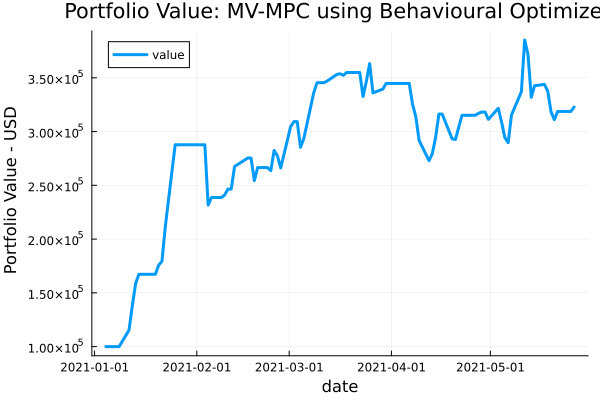

In [180]:

BH_params = merge(core_MPC_parameters,Dict(
        "pastHorizon"=>26
        ))
BH_extras = merge(core_MPC_extras,Dict())

BH_MPC_initialize!(context) = general_initialize!(context,BH_extras, BH_params; returnHistoryStartData=returnHistoryStartData_Backtest)  
BH_MPC_TL!(context, data) = MPC_tradingLogic!(context, data; forecastFun=behaviouralForecast)

BH_Backtest_Context = DEDS.run(
        data,
        BH_MPC_initialize!,
        BH_MPC_TL!,
        my_execute_orders!,
        my_expose_data;
        audit=true,
        max_iter=100, # Run for 100 business days
        verbose=true,
        initialEvents=deepcopy(evaluationEvents),
    )

results = summarizePerformance(OHLCV_data, BH_Backtest_Context; includeAccounts=false)
plotd=plot(results.date[2:end], results.dollarValue[2:end], title="Portfolio Value: MV-MPC using Behavioural Optimized", label="value",xlabel="date",ylabel=" Portfolio Value - USD", linewidth=3)
     
fig_dir = joinpath(@__DIR__, "figures")
savefig(plotd,joinpath(fig_dir,"E1_02_BH_Forecast_Optimized.svg"))
display(plotd)